In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean,inf,arange
from numpy import std,var
from pandas import read_csv
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, plot_confusion_matrix, accuracy_score

In [4]:
scaler = StandardScaler()

In [5]:
df = pd.read_csv('../../../data/dataset.csv')

In [6]:
def get_new_target(col):
    return 1 if col == 'V' else 0

In [7]:
df['new_target'] = df['liverpool_result_ft'].apply(get_new_target)

In [8]:
y = df['liverpool_result_ft']

In [9]:
y_new = df['new_target']

In [10]:
x = df.drop(columns=['liverpool_result_ft','new_target'])

In [11]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3)

# SVM

## C value

In [26]:
model = SVC()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.603 (0.029)


In [34]:
params = {'C': np.linspace(1,10,10).astype(int)}

In [35]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [36]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [37]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

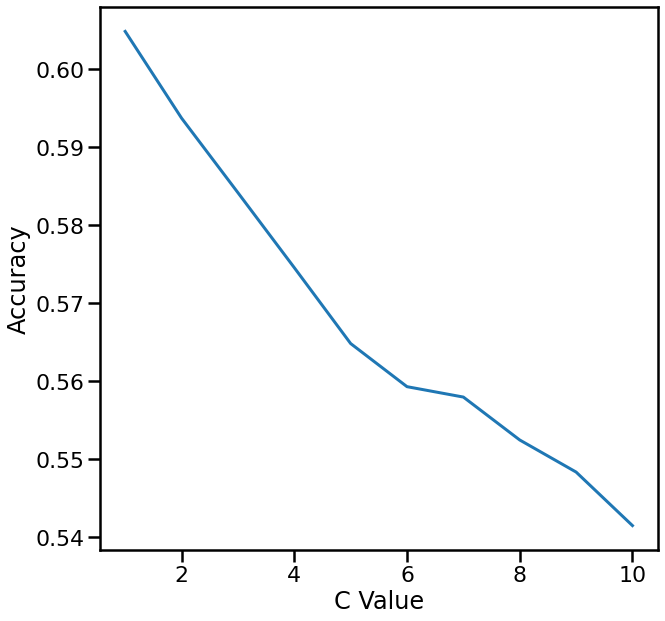

In [38]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_C', y='mean_test_score',data=res,markers='o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')

In [40]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010473,0.002914,0.005001,0.001457,1,{'C': 1},0.612245,0.571429,0.562500,0.645833,...,0.625000,0.645833,0.591837,0.571429,0.645833,0.604167,0.645833,0.604819,0.032775,1
1,0.010579,0.002230,0.006867,0.008357,2,{'C': 2},0.632653,0.591837,0.479167,0.625000,...,0.541667,0.645833,0.510204,0.591837,0.604167,0.604167,0.645833,0.593707,0.051073,2
2,0.013468,0.009604,0.004668,0.001578,3,{'C': 3},0.632653,0.551020,0.458333,0.604167,...,0.583333,0.666667,0.551020,0.571429,0.541667,0.645833,0.645833,0.584155,0.054382,3


In [41]:
model_1 = search.best_estimator_

In [42]:
model_pred_1 = model_1.predict(x_test)

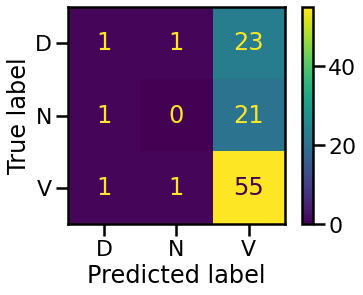

In [43]:
plot_confusion_matrix(model_1,x_test,y_test)

In [44]:
accuracy_score(y_test,model_pred_1)

0.5384615384615384

In [45]:
print(classification_report(y_test,model_pred_1))

              precision    recall  f1-score   support

           D       0.33      0.04      0.07        25
           N       0.00      0.00      0.00        22
           V       0.56      0.96      0.71        57

    accuracy                           0.54       104
   macro avg       0.30      0.33      0.26       104
weighted avg       0.38      0.54      0.40       104



## Gamma

In [46]:
model = SVC()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.603 (0.029)


In [47]:
params = {'gamma': [1,0.1,0.01,0.001]
        }

In [48]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [49]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [1, 0.1, 0.01, 0.001]}, scoring='accuracy')

In [50]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

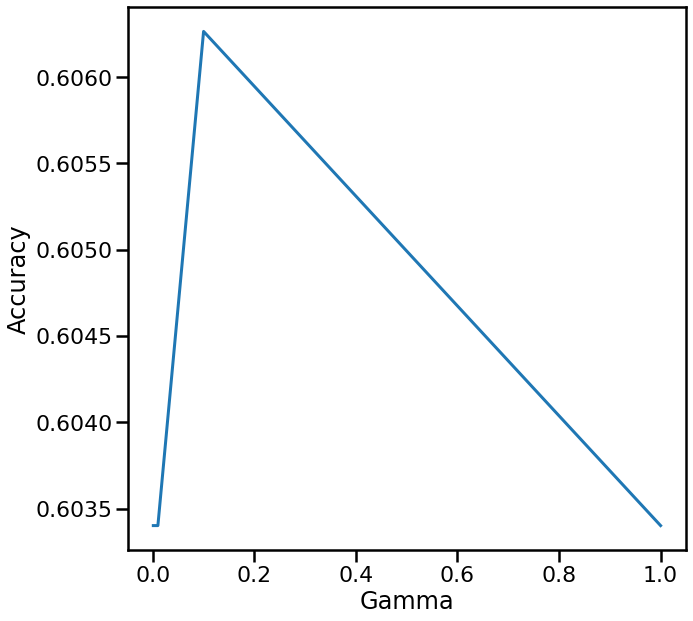

In [53]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_gamma', y='mean_test_score',data=res,markers='o')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [54]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
1,0.009862,0.003011,0.004802,0.001794,0.1,{'gamma': 0.1},0.612245,0.571429,0.583333,0.645833,...,0.625000,0.625,0.551020,0.571429,0.645833,0.625000,0.645833,0.606264,0.029534,1
0,0.011534,0.003369,0.005865,0.003218,1,{'gamma': 1},0.591837,0.591837,0.604167,0.604167,...,0.604167,0.625,0.591837,0.591837,0.604167,0.604167,0.625000,0.603401,0.012126,2
2,0.011472,0.006832,0.004836,0.000989,0.01,{'gamma': 0.01},0.591837,0.591837,0.604167,0.604167,...,0.604167,0.625,0.591837,0.591837,0.604167,0.604167,0.625000,0.603401,0.012126,2


In [55]:
model_2 = search.best_estimator_

In [56]:
model_pred_2 = model_2.predict(x_test)

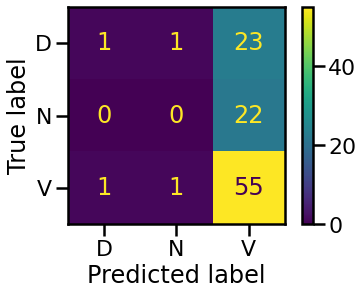

In [57]:
plot_confusion_matrix(model_2,x_test,y_test)

In [58]:
accuracy_score(y_test,model_pred_2)

0.5384615384615384

In [59]:
print(classification_report(y_test,model_pred_2))

              precision    recall  f1-score   support

           D       0.50      0.04      0.07        25
           N       0.00      0.00      0.00        22
           V       0.55      0.96      0.70        57

    accuracy                           0.54       104
   macro avg       0.35      0.33      0.26       104
weighted avg       0.42      0.54      0.40       104



## Kernel

In [60]:
model = SVC(gamma=0.1)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.599 (0.029)


In [61]:
params = {
        
         'kernel': ['rbf', 'poly', 'sigmoid']
         
        }

In [62]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [63]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(gamma=0.1), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [64]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

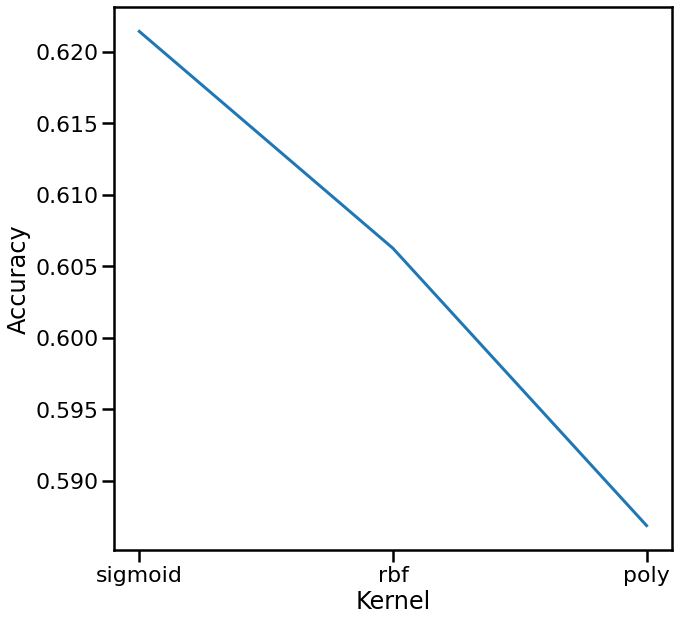

In [65]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_kernel', y='mean_test_score',data=res,markers='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')

In [66]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
2,0.008916,0.001867,0.005518,0.005526,sigmoid,{'kernel': 'sigmoid'},0.591837,0.591837,0.604167,0.604167,...,0.645833,0.6875,0.571429,0.632653,0.604167,0.687500,0.604167,0.621429,0.040412,1
0,0.011412,0.004000,0.006465,0.005150,rbf,{'kernel': 'rbf'},0.612245,0.571429,0.583333,0.645833,...,0.625000,0.6250,0.551020,0.571429,0.645833,0.625000,0.645833,0.606264,0.029534,2
1,0.011469,0.006294,0.004312,0.001070,poly,{'kernel': 'poly'},0.571429,0.591837,0.500000,0.583333,...,0.562500,0.6250,0.510204,0.591837,0.583333,0.604167,0.708333,0.586876,0.049266,3


In [67]:
model_3 = search.best_estimator_

In [68]:
model_pred_3 = model_1.predict(x_test)

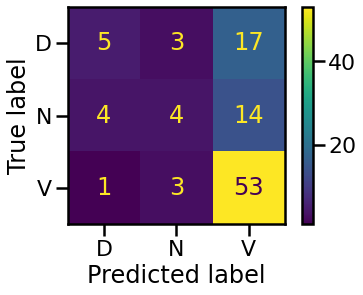

In [69]:
plot_confusion_matrix(model_3,x_test,y_test)

In [70]:
accuracy_score(y_test,model_pred_3)

0.5384615384615384

In [71]:
print(classification_report(y_test,model_pred_3))

              precision    recall  f1-score   support

           D       0.33      0.04      0.07        25
           N       0.00      0.00      0.00        22
           V       0.56      0.96      0.71        57

    accuracy                           0.54       104
   macro avg       0.30      0.33      0.26       104
weighted avg       0.38      0.54      0.40       104



## Degree

In [72]:
model = SVC(gamma=0.1,kernel='sigmoid')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.572 (0.038)


In [78]:
params = {
        
         'degree':np.linspace(1,10,10).astype(int),
         
        }

In [79]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [80]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(gamma=0.1, kernel='sigmoid'), n_jobs=-1,
             param_grid={'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [81]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

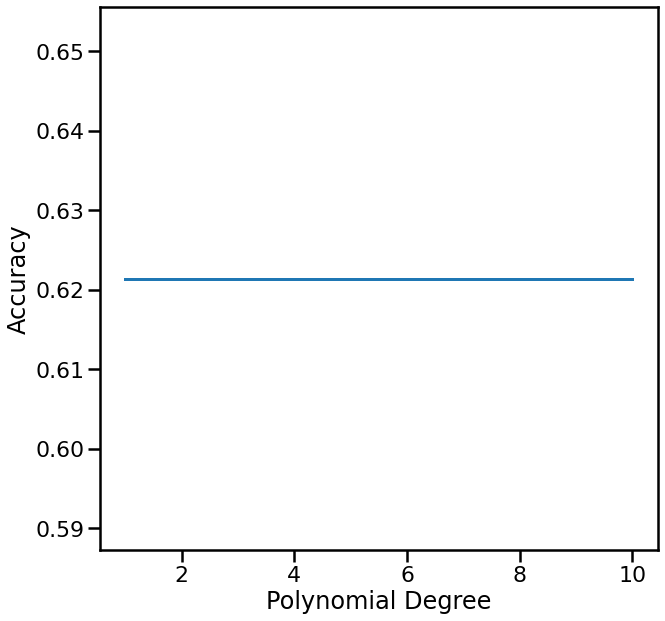

In [82]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_degree', y='mean_test_score',data=res,markers='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')

In [83]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010722,0.003835,0.007309,0.004800,1,{'degree': 1},0.591837,0.591837,0.604167,0.604167,...,0.645833,0.6875,0.571429,0.632653,0.604167,0.6875,0.604167,0.621429,0.040412,1
1,0.009969,0.002677,0.004273,0.001150,2,{'degree': 2},0.591837,0.591837,0.604167,0.604167,...,0.645833,0.6875,0.571429,0.632653,0.604167,0.6875,0.604167,0.621429,0.040412,1
2,0.008590,0.001588,0.006710,0.007367,3,{'degree': 3},0.591837,0.591837,0.604167,0.604167,...,0.645833,0.6875,0.571429,0.632653,0.604167,0.6875,0.604167,0.621429,0.040412,1


In [84]:
model_4 = search.best_estimator_

In [85]:
model_pred_4 = model_4.predict(x_test)

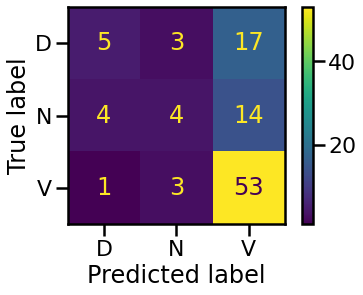

In [86]:
plot_confusion_matrix(model_4,x_test,y_test)

In [87]:
accuracy_score(y_test,model_pred_4)

0.5961538461538461

In [88]:
print(classification_report(y_test,model_pred_4))

              precision    recall  f1-score   support

           D       0.50      0.20      0.29        25
           N       0.40      0.18      0.25        22
           V       0.63      0.93      0.75        57

    accuracy                           0.60       104
   macro avg       0.51      0.44      0.43       104
weighted avg       0.55      0.60      0.53       104



# Logistic Regressin

In [91]:
model = LogisticRegression()

In [92]:
model.fit(x_train,y_train)

LogisticRegression()

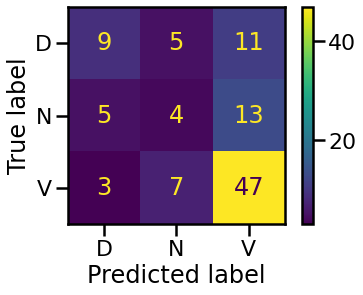

In [93]:
plot_confusion_matrix(model,x_test,y_test)
plt.savefig('lr_confusion_matrix_multi.jpg')

In [94]:
accuracy_score(y_test,model.predict(x_test))

0.5769230769230769

In [95]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           D       0.53      0.36      0.43        25
           N       0.25      0.18      0.21        22
           V       0.66      0.82      0.73        57

    accuracy                           0.58       104
   macro avg       0.48      0.46      0.46       104
weighted avg       0.54      0.58      0.55       104



# Binary Classification

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_new,test_size = 0.3)

# SVM

## C value

In [97]:
model = SVC()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.603 (0.029)


In [98]:
params = {'C': np.linspace(1,10,10).astype(int)}

In [99]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [100]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [101]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

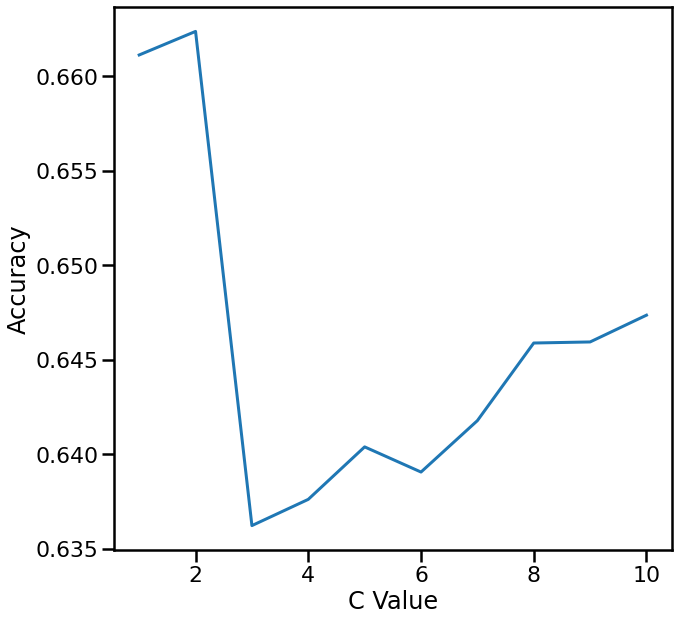

In [102]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_C', y='mean_test_score',data=res,markers='o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')

In [103]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
1,0.009634,0.002863,0.004693,0.000896,2,{'C': 2},0.693878,0.673469,0.750000,0.666667,...,0.666667,0.604167,0.632653,0.693878,0.6875,0.687500,0.604167,0.662387,0.046858,1
0,0.007493,0.000844,0.004274,0.000610,1,{'C': 1},0.612245,0.653061,0.791667,0.729167,...,0.625000,0.645833,0.673469,0.673469,0.6250,0.645833,0.604167,0.661139,0.047269,2
9,0.008536,0.000883,0.004067,0.000932,10,{'C': 10},0.591837,0.653061,0.729167,0.645833,...,0.645833,0.625000,0.632653,0.632653,0.6875,0.645833,0.625000,0.647364,0.041006,3


In [104]:
model_1 = search.best_estimator_

In [105]:
model_pred_1 = model_1.predict(x_test)

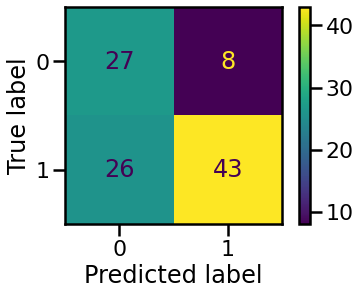

In [106]:
plot_confusion_matrix(model_1,x_test,y_test)

In [107]:
accuracy_score(y_test,model_pred_1)

0.6730769230769231

In [108]:
print(classification_report(y_test,model_pred_1))

              precision    recall  f1-score   support

           0       0.51      0.77      0.61        35
           1       0.84      0.62      0.72        69

    accuracy                           0.67       104
   macro avg       0.68      0.70      0.67       104
weighted avg       0.73      0.67      0.68       104



## Gamma

In [109]:
model = SVC()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.603 (0.029)


In [110]:
params = {'gamma': [1,0.1,0.01,0.001]
        }

In [111]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [112]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [1, 0.1, 0.01, 0.001]}, scoring='accuracy')

In [113]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

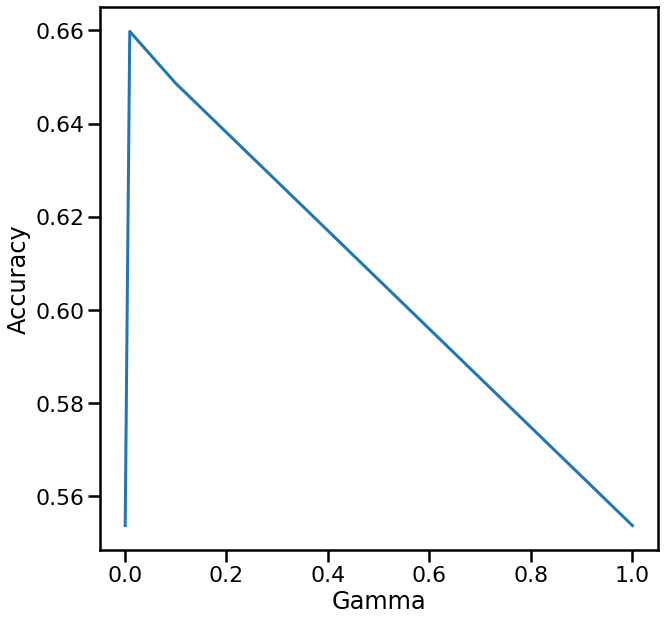

In [114]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_gamma', y='mean_test_score',data=res,markers='o')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [115]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
2,0.010396,0.007544,0.005666,0.001774,0.01,{'gamma': 0.01},0.551020,0.653061,0.750000,0.729167,...,0.625000,0.708333,0.653061,0.714286,0.583333,0.6250,0.645833,0.659779,0.053159,1
1,0.008798,0.001794,0.004605,0.001453,0.1,{'gamma': 0.1},0.632653,0.653061,0.729167,0.666667,...,0.645833,0.604167,0.653061,0.693878,0.625000,0.6250,0.645833,0.648696,0.033557,2
0,0.007731,0.000674,0.003936,0.000444,1,{'gamma': 1},0.551020,0.551020,0.541667,0.562500,...,0.562500,0.562500,0.551020,0.551020,0.541667,0.5625,0.562500,0.553741,0.007925,3


In [116]:
model_2 = search.best_estimator_

In [117]:
model_pred_2 = model_2.predict(x_test)

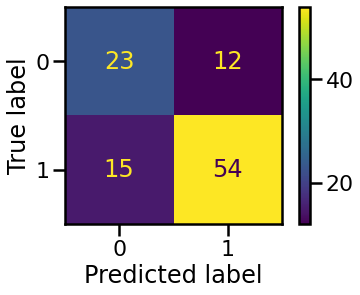

In [118]:
plot_confusion_matrix(model_2,x_test,y_test)

In [119]:
accuracy_score(y_test,model_pred_2)

0.7403846153846154

In [120]:
print(classification_report(y_test,model_pred_2))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        35
           1       0.82      0.78      0.80        69

    accuracy                           0.74       104
   macro avg       0.71      0.72      0.72       104
weighted avg       0.75      0.74      0.74       104



## Kernel

In [121]:
model = SVC(gamma=0.1)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.599 (0.029)


In [122]:
params = {
        
         'kernel': ['rbf', 'poly', 'sigmoid']
         
        }

In [123]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [124]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(gamma=0.1), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [125]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

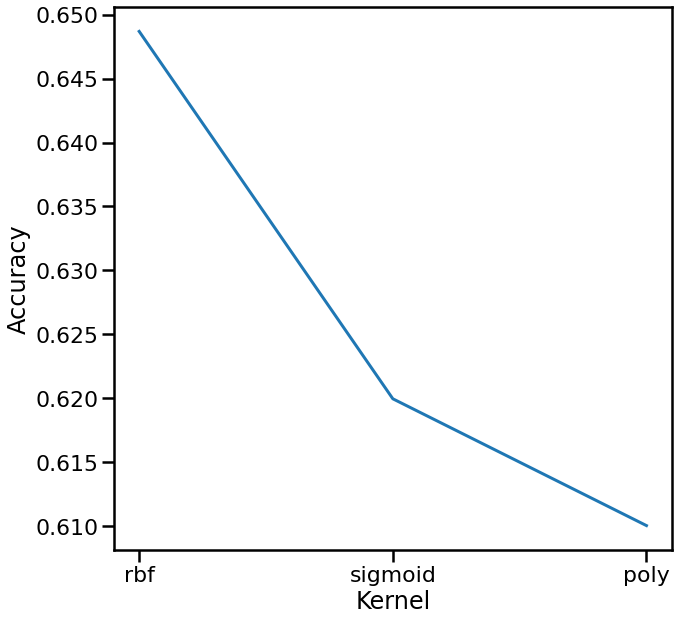

In [126]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_kernel', y='mean_test_score',data=res,markers='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')

In [127]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008943,0.002542,0.006134,0.002225,rbf,{'kernel': 'rbf'},0.632653,0.653061,0.729167,0.666667,...,0.645833,0.604167,0.653061,0.693878,0.625000,0.625000,0.645833,0.648696,0.033557,1
2,0.008580,0.002951,0.004150,0.001512,sigmoid,{'kernel': 'sigmoid'},0.571429,0.591837,0.666667,0.645833,...,0.625000,0.645833,0.591837,0.571429,0.625000,0.666667,0.687500,0.619955,0.047799,2
1,0.009264,0.002462,0.005267,0.001950,poly,{'kernel': 'poly'},0.530612,0.693878,0.645833,0.645833,...,0.583333,0.541667,0.653061,0.612245,0.645833,0.604167,0.562500,0.610034,0.053079,3


In [128]:
model_3 = search.best_estimator_

In [129]:
model_pred_3 = model_1.predict(x_test)

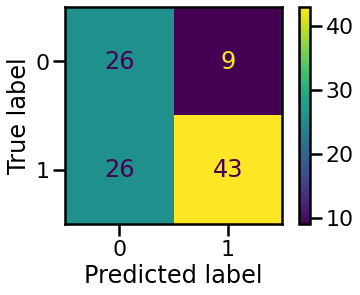

In [130]:
plot_confusion_matrix(model_3,x_test,y_test)

In [131]:
accuracy_score(y_test,model_pred_3)

0.6730769230769231

In [132]:
print(classification_report(y_test,model_pred_3))

              precision    recall  f1-score   support

           0       0.51      0.77      0.61        35
           1       0.84      0.62      0.72        69

    accuracy                           0.67       104
   macro avg       0.68      0.70      0.67       104
weighted avg       0.73      0.67      0.68       104



## Degree

In [164]:
model = SVC(gamma=0.1,kernel='sigmoid',probability=True)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.572 (0.038)


In [165]:
params = {
        
         'degree':np.linspace(1,10,10).astype(int),
         
        }

In [166]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [167]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=SVC(gamma=0.1, kernel='sigmoid', probability=True),
             n_jobs=-1,
             param_grid={'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [168]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

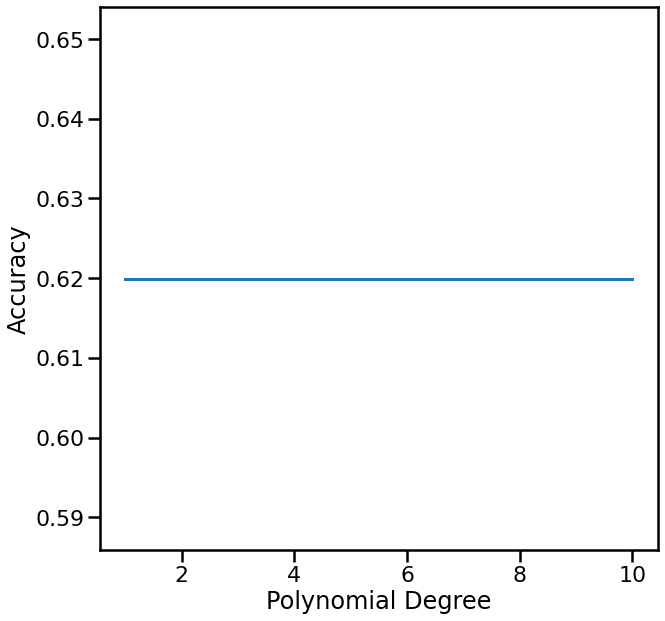

In [169]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_degree', y='mean_test_score',data=res,markers='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')

In [170]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015725,0.002266,0.004005,0.001096,1,{'degree': 1},0.571429,0.591837,0.666667,0.645833,...,0.625,0.645833,0.591837,0.571429,0.625,0.666667,0.6875,0.619955,0.047799,1
1,0.017594,0.003139,0.004469,0.001784,2,{'degree': 2},0.571429,0.591837,0.666667,0.645833,...,0.625,0.645833,0.591837,0.571429,0.625,0.666667,0.6875,0.619955,0.047799,1
2,0.019666,0.008411,0.006868,0.009283,3,{'degree': 3},0.571429,0.591837,0.666667,0.645833,...,0.625,0.645833,0.591837,0.571429,0.625,0.666667,0.6875,0.619955,0.047799,1


In [171]:
model_4 = search.best_estimator_

In [172]:
model_pred_4 = model_4.predict(x_test)

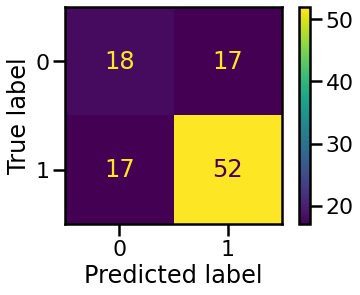

In [173]:
plot_confusion_matrix(model_4,x_test,y_test)

In [174]:
accuracy_score(y_test,model_pred_4)

0.6730769230769231

In [175]:
print(classification_report(y_test,model_pred_4))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        35
           1       0.75      0.75      0.75        69

    accuracy                           0.67       104
   macro avg       0.63      0.63      0.63       104
weighted avg       0.67      0.67      0.67       104



In [176]:
pred_svm = model_4.predict_proba(x_test)

# Logistic Regressin

In [16]:
model = LogisticRegression()

In [17]:
bias_variance_decomp(model, x_train, y_train, x_test, y_test, num_rounds=200, random_seed=1)

KeyError: "None of [Int64Index([ 37, 235, 140,  72, 137, 203, 133,  79, 192, 144,\n            ...\n             21,  40,  77, 219, 177, 113,  47, 205, 168, 206],\n           dtype='int64', length=242)] are in the [columns]"

In [14]:
model.fit(x_train,y_train)

LogisticRegression()

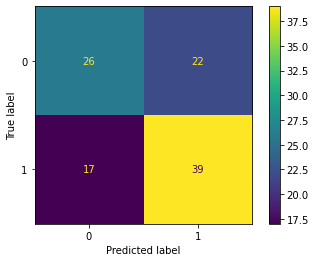

In [15]:
plot_confusion_matrix(model,x_test,y_test)
plt.savefig('lr_confusion_matrix_multi.jpg')

In [182]:
accuracy_score(y_test,model.predict(x_test))

0.7019230769230769

In [183]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61        35
           1       0.82      0.71      0.76        69

    accuracy                           0.70       104
   macro avg       0.68      0.70      0.68       104
weighted avg       0.73      0.70      0.71       104



In [184]:
pred_lr = model.predict_proba(x_test)

# ROC and AUC

In [185]:
pred_lr = pred_lr[:,1]

In [186]:
lr_fpr, lr_tpr, thresh = roc_curve(y_test,pred_lr)

In [187]:
auc_lr = auc(lr_fpr,lr_tpr)

In [188]:
pred_svm = pred_svm[:,1]

In [189]:
svm_fpr,svm_tpr,thresh_ = roc_curve(y_test,pred_svm)
auc_svm = auc(svm_fpr,svm_tpr)

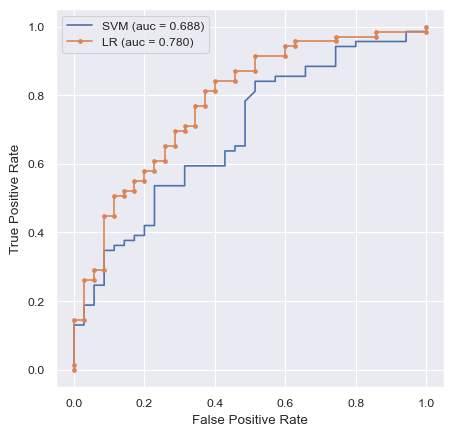

In [192]:
sns.set_theme()
sns.set_context('paper')
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR (auc = %0.3f)' % auc_lr)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_auc_probabilistic_models.png')